Linear Relationship:
	Correlation :  1.0
	NMI :  1.0
	pps :  0.99
	HSIC :  0.93
Linear Relationship:
	Correlation :  0.98
	NMI :  0.6
	pps :  0.75
	HSIC :  0.86
Sine Relationship:
	Correlation :  0.07
	NMI :  0.47
	pps :  0.86
	HSIC :  0.44
Parabola Relationship:
	Correlation :  -0.08
	NMI :  0.49
	pps :  0.74
	HSIC :  0.48
Random Relationship:
	Correlation :  -0.01
	NMI :  0.07
	pps :  0
	HSIC :  0.04


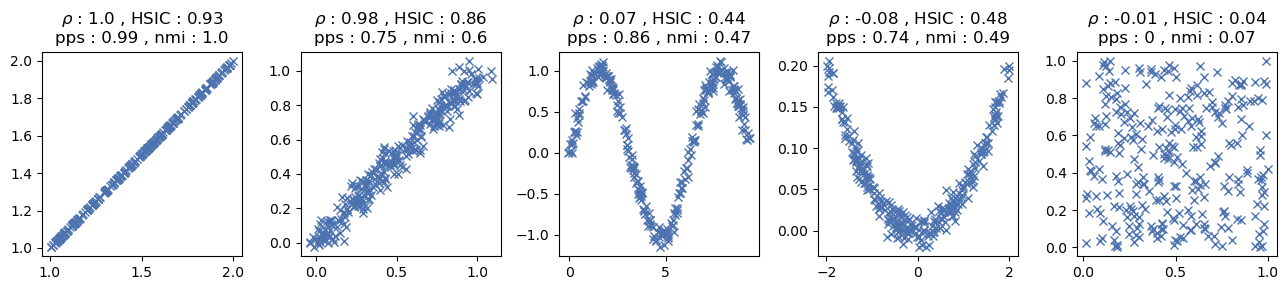

In [7]:
#!/usr/bin/env python

import wuml 
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats.stats import pearsonr  
from sklearn.preprocessing import KBinsDiscretizer
from wplotlib import histograms
from wplotlib import lines
import ppscore as pps
from sklearn.metrics.cluster import normalized_mutual_info_score
import matplotlib.pyplot as plt


n = 300

#	Perfect Linear Data
dat = np.random.rand(n,1)
plinear_data = np.hstack((dat,dat)) + 1
df = pd.DataFrame(data=plinear_data, columns=["x", "y"])

enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
XP_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(plinear_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
YP_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(plinear_data[:,1]).T))

plinear_pc = np.round(pearsonr(plinear_data[:,0], plinear_data[:,1])[0], 2)
plinear_nmi = np.round(normalized_mutual_info_score(XP_data_nmi, YP_data_nmi),2)
plinear_hsic = np.round(wuml.HSIC(plinear_data[:,0], plinear_data[:,1], sigma_type='opt'),2)	
plinear_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

print('Linear Relationship:')
print('\tCorrelation : ', plinear_pc)
print('\tNMI : ', plinear_nmi)
print('\tpps : ', plinear_pps)
print('\tHSIC : ', plinear_hsic)


#	Linear Data
dat = np.random.rand(n,1)
linear_data = np.hstack((dat,dat)) + 0.04*np.random.randn(n,2)
df = pd.DataFrame(data=linear_data, columns=["x", "y"])

enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
XL_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(linear_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
YL_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(linear_data[:,1]).T))

linear_pc = np.round(pearsonr(linear_data[:,0], linear_data[:,1])[0], 2)
linear_nmi = np.round(normalized_mutual_info_score(XL_data_nmi, YL_data_nmi),2)
linear_hsic = np.round(wuml.HSIC(linear_data[:,0], linear_data[:,1], sigma_type='opt'),2)	
linear_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

print('Linear Relationship:')
print('\tCorrelation : ', linear_pc)
print('\tNMI : ', linear_nmi)
print('\tpps : ', linear_pps)
print('\tHSIC : ', linear_hsic)

#	Sine Data
dat_x = 9.3*np.random.rand(n,1)
dat_y = np.sin(dat_x)
sine_data = np.hstack((dat_x,dat_y)) + 0.06*np.random.randn(n,2)
df = pd.DataFrame(data=sine_data, columns=["x", "y"])
sine_pc = np.round(pearsonr(sine_data[:,0], sine_data[:,1])[0],2)

enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Xsine_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(sine_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Ysine_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(sine_data[:,1]).T))

sine_nmi = np.round(normalized_mutual_info_score(Xsine_data_nmi, Ysine_data_nmi),2)
sine_hsic = np.round(wuml.HSIC(sine_data[:,0], sine_data[:,1], sigma_type='opt'),2)
sine_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

print('Sine Relationship:')
print('\tCorrelation : ', sine_pc)
print('\tNMI : ', sine_nmi)
print('\tpps : ', sine_pps)
print('\tHSIC : ', sine_hsic)


#	Parabola Data
dat_x = 4*np.random.rand(n,1) - 2
dat_y = 0.05*dat_x*dat_x
para_data = np.hstack((dat_x,dat_y)) + 0.01*np.random.randn(n,2)
df = pd.DataFrame(data=para_data, columns=["x", "y"])

enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Xp_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(para_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Yp_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(para_data[:,1]).T))

para_pc = np.round(pearsonr(para_data[:,0], para_data[:,1])[0],2)
para_nmi = np.round(normalized_mutual_info_score(Xp_data_nmi, Yp_data_nmi),2)
para_hsic = np.round(wuml.HSIC(para_data[:,0], para_data[:,1], sigma_type='opt'),2)
para_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

print('Parabola Relationship:')
print('\tCorrelation : ', para_pc)
print('\tNMI : ', para_nmi)
print('\tpps : ', para_pps)
print('\tHSIC : ', para_hsic)

#	Random uniform Data
unif_data = np.random.rand(n,2)
df = pd.DataFrame(data=unif_data, columns=["x", "y"])

enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Xr_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(unif_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Yr_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(unif_data[:,1]).T))


unif_pc = np.round(pearsonr(unif_data[:,0], unif_data[:,1])[0],2)
unif_hsic = np.round(wuml.HSIC(unif_data[:,0], unif_data[:,1], sigma_type='opt'),2)
unif_nmi = np.round(normalized_mutual_info_score(Xr_data_nmi, Yr_data_nmi),2)
unif_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

print('Random Relationship:')
print('\tCorrelation : ', unif_pc)
print('\tNMI : ', unif_nmi)
print('\tpps : ', unif_pps)
print('\tHSIC : ', unif_hsic)


plt.figure(figsize=(13,3))

plt.subplot(151)
plt.plot(plinear_data[:,0], plinear_data[:,1], 'bx')
plt.title('$\\rho$ : ' + str(plinear_pc) + ' , HSIC : ' + str(plinear_hsic) + '\npps : ' + str(plinear_pps) + ' , nmi : ' + str(plinear_nmi))

plt.subplot(152)
plt.plot(linear_data[:,0], linear_data[:,1], 'bx')
plt.title('$\\rho$ : ' + str(linear_pc) + ' , HSIC : ' + str(linear_hsic) + '\npps : ' + str(linear_pps) + ' , nmi : ' + str(linear_nmi))

plt.subplot(153)
plt.plot(sine_data[:,0], sine_data[:,1], 'bx')
plt.title('$\\rho$ : ' + str(sine_pc) + ' , HSIC : ' + str(sine_hsic) + '\npps : ' + str(sine_pps) + ' , nmi : ' + str(sine_nmi))

plt.subplot(154)
plt.plot(para_data[:,0], para_data[:,1], 'bx')
plt.title('$\\rho$ : ' + str(para_pc) + ' , HSIC : ' + str(para_hsic) + '\npps : ' + str(para_pps) + ' , nmi : ' + str(para_nmi))

plt.subplot(155)
plt.plot(unif_data[:,0], unif_data[:,1], 'bx')
plt.title('$\\rho$ : ' + str(unif_pc) + ' , HSIC : ' + str(unif_hsic) + '\npps : ' + str(unif_pps) + ' , nmi : ' + str(unif_nmi))

plt.tight_layout()
plt.show()

In [8]:
data = wuml.wData('../../data/shap_regress_example_uniform.csv', first_row_is_label=True)
data.df.style

,A,B,C,D,label
0,0.548800,0.715200,0.602800,0.544900,-1.101000
1,0.423700,0.645900,0.437600,0.891800,-5.669000
2,0.963700,0.383400,0.791700,0.528900,0.781900
3,0.568000,0.925600,0.071000,0.087100,3.583400
4,0.020200,0.832600,0.778200,0.870000,-7.504600
5,0.978600,0.799200,0.461500,0.780500,-1.001800
6,0.118300,0.639900,0.143400,0.944700,-8.047900
7,0.521800,0.414700,0.264600,0.774200,-4.142800
8,0.456200,0.568400,0.018800,0.617600,-2.607300
9,0.612100,0.616900,0.943700,0.681800,-2.309800


In [9]:
X1 = data.get_columns(['A','B','D'])
X2 = data.get_columns(['C','label'])
X3 = data.get_columns(['C'])
Y = data.get_columns(['label'])

H1 = wuml.HSIC(X1, X2, sigma_type='mpd')
H2 = wuml.HSIC(X1, Y, sigma_type='mpd')
H3 = wuml.HSIC(X3, Y, sigma_type='mpd')

print(H1, H2, H3)

0.5469610797877741 0.545266645508129 0.03431922959159294
